import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [91]:
df = pd.read_csv('HR-Employee-Attrition.csv')

In [92]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [93]:
### 
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [94]:
df.shape

(1470, 35)

#### EDA

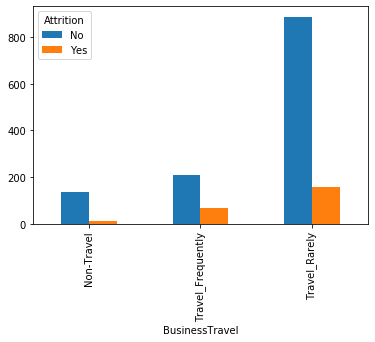

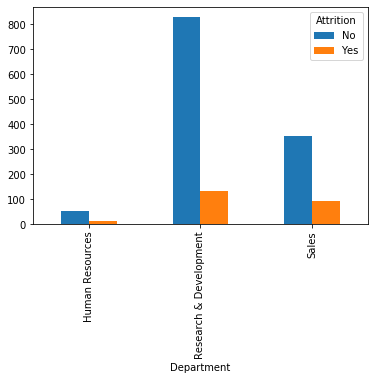

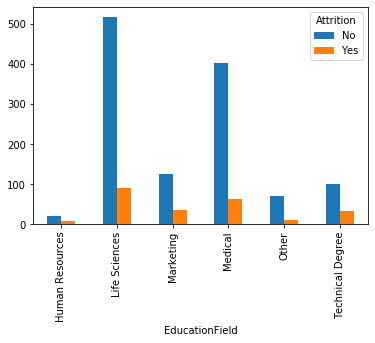

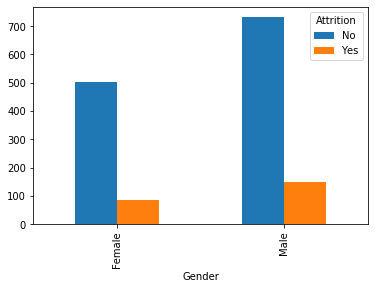

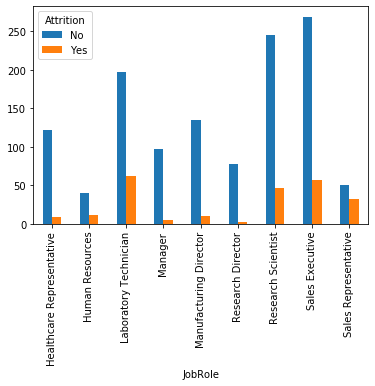

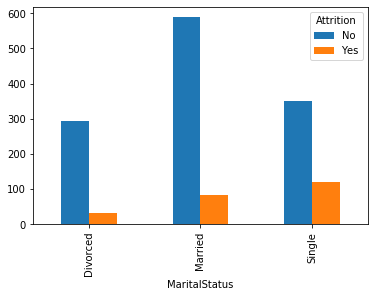

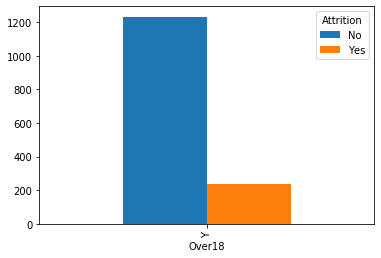

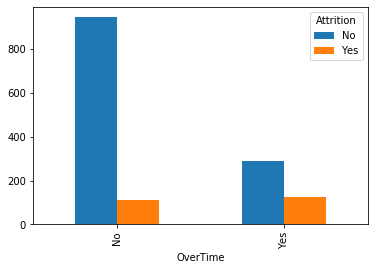

In [96]:
df_cat = df.select_dtypes(include='object')
df_cat = df_cat.drop('Attrition',axis=1)
for cols in df_cat.columns:
    pd.crosstab(df[cols],df['Attrition']).plot.bar()

In [97]:
df_num = df.select_dtypes(exclude='object')
df_num.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,1,1,2,94,3,2,...,1,80,0,8,0,1,6,4,0,5
1,49,279,8,1,1,2,3,61,2,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1373,2,2,1,4,4,92,2,1,...,2,80,0,7,3,3,0,0,0,0
3,33,1392,3,4,1,5,4,56,3,1,...,3,80,0,8,3,3,8,7,3,0
4,27,591,2,1,1,7,1,40,3,1,...,4,80,1,6,3,3,2,2,2,2


In [98]:
df_cat = df_cat.drop(['Over18'],axis=1)

In [120]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 22 columns):
BusinessTravel_Travel_Frequently     1470 non-null uint8
BusinessTravel_Travel_Rarely         1470 non-null uint8
Department_Research & Development    1470 non-null uint8
Department_Sales                     1470 non-null uint8
EducationField_Life Sciences         1470 non-null uint8
EducationField_Marketing             1470 non-null uint8
EducationField_Medical               1470 non-null uint8
EducationField_Other                 1470 non-null uint8
EducationField_Technical Degree      1470 non-null uint8
Gender_Male                          1470 non-null uint8
JobRole_Human Resources              1470 non-null uint8
JobRole_Laboratory Technician        1470 non-null uint8
JobRole_Manager                      1470 non-null uint8
JobRole_Manufacturing Director       1470 non-null uint8
JobRole_Research Director            1470 non-null uint8
JobRole_Research Scientist           1

In [99]:
df_num = df_num.drop(['StandardHours','EmployeeNumber'],axis=1)

In [100]:
df_cat['Attrition'] = df['Attrition']

In [101]:
df_cat = pd.get_dummies(df_cat,drop_first=True)

In [102]:
df_cat.shape

(1470, 22)

In [103]:
df_final = pd.concat([df_num,df_cat],axis=1)

In [104]:
df_final.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes,Attrition_Yes
0,41,1102,1,2,1,2,94,3,2,4,...,0,0,0,0,1,0,0,1,1,1
1,49,279,8,1,1,3,61,2,2,2,...,0,0,0,1,0,0,1,0,0,0
2,37,1373,2,2,1,4,92,2,1,3,...,0,0,0,0,0,0,0,1,1,1
3,33,1392,3,4,1,4,56,3,1,3,...,0,0,0,1,0,0,1,0,1,0
4,27,591,2,1,1,1,40,3,1,2,...,0,0,0,0,0,0,1,0,0,0


In [105]:
X = df_final.drop(['Attrition_Yes'],axis=1)
y = df_final['Attrition_Yes']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=1)

In [106]:
import statsmodels.api as sm
glm = sm.GLM(list(y_train),(sm.add_constant(X_train)),family=sm.families.Binomial())
model = glm.fit()

In [107]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                 1176
Model:                            GLM   Df Residuals:                     1131
Model Family:                Binomial   Df Model:                           44
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -327.02
Date:                Wed, 18 Dec 2019   Deviance:                       654.03
Time:                        11:02:52   Pearson chi2:                 1.98e+03
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Age                                  -0.0362      0.016     -2.263      0.024      -0.067      -0.005
DailyRate                            -0.0004      0.000     -1.394      0.163      -0.001       0.000
DistanceFromHome                      0.0547      0.013      4.335      0.000       0.030       0.079
Education                             0.0983      0.104      0.944      0.345      -0.106       0.302
EmployeeCount                       -17.8088   1.29e+04     -0.001      0.999   -2.53e+04    2.52e+04
EnvironmentSatisfaction              -0.4107      0.096     -4.289      0.000      -0.598      -0.223
HourlyRate                            0.0062      0.005      1.191      0.234      -0.004       0.016
JobInvolvement                       -0.4860      0.138     -3.522      0.000      -0.756      -0.216
JobLevel                              0.0078      0.361      0.022      0.983      -0.699       0.715
JobSatisfaction                      -0.2978      0.093     -3.201      0.001      -0.480      -0.115
MonthlyIncome                      -3.33e-06   9.34e-05     -0.036      0.972      -0.000       0.000
MonthlyRate                       -2.607e-07   1.46e-05     -0.018      0.986   -2.89e-05    2.84e-05
NumCompaniesWorked                    0.1465      0.045      3.234      0.001       0.058       0.235
PercentSalaryHike                    -0.0196      0.045     -0.441      0.659      -0.107       0.068
PerformanceRating                    -0.1889      0.464     -0.407      0.684      -1.099       0.721
RelationshipSatisfaction             -0.1494      0.096     -1.552      0.121      -0.338       0.039
StockOptionLevel                     -0.2765      0.191     -1.451      0.147      -0.650       0.097
TotalWorkingYears                    -0.0447      0.033     -1.373      0.170      -0.109       0.019
TrainingTimesLastYear                -0.1529      0.085     -1.805      0.071      -0.319       0.013
WorkLifeBalance                      -0.5551      0.147     -3.783      0.000      -0.843      -0.268
YearsAtCompany                        0.1018      0.043      2.340      0.019       0.017       0.187
YearsInCurrentRole                   -0.1583      0.053     -3.003      0.003      -0.262      -0.055
YearsSinceLastPromotion               0.1915      0.049      3.910      0.000       0.096       0.288
YearsWithCurrManager                 -0.1639      0.055     -2.978      0.003      -0.272      -0.056
BusinessTravel_Travel_Frequently      2.1748      0.501      4.341      0.000       1.193       3.157
BusinessTravel_Travel_Rarely          1.2981      0.468      2.773      0.006       0.381       2.216
Department_Research & Development    20.6858   1.29e+04      0.002      0.999   -2.52e+04    2.53e+04
Department_Sales       

In [108]:
l1=[]
for i in range(model.pvalues.shape[0]):
    if model.pvalues[i]<=0.05 and model.pvalues.index[i]!='const':
        l1.append(model.pvalues.index[i])
len(l1)

16

In [109]:
df_fin = df_final[l1]
df_fin.shape

(1470, 16)

In [121]:
df_fin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 16 columns):
Age                                 1470 non-null int64
DistanceFromHome                    1470 non-null int64
EnvironmentSatisfaction             1470 non-null int64
JobInvolvement                      1470 non-null int64
JobSatisfaction                     1470 non-null int64
NumCompaniesWorked                  1470 non-null int64
WorkLifeBalance                     1470 non-null int64
YearsAtCompany                      1470 non-null int64
YearsInCurrentRole                  1470 non-null int64
YearsSinceLastPromotion             1470 non-null int64
YearsWithCurrManager                1470 non-null int64
BusinessTravel_Travel_Frequently    1470 non-null uint8
BusinessTravel_Travel_Rarely        1470 non-null uint8
JobRole_Laboratory Technician       1470 non-null uint8
MaritalStatus_Single                1470 non-null uint8
OverTime_Yes                        1470 non-null uin

In [127]:
df_fin_cat = df_fin.select_dtypes(include='uint8')
df_fin_num = df_fin.select_dtypes(exclude='uint8')

In [128]:
df_fin_num.columns

Index(['Age', 'DistanceFromHome', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobSatisfaction', 'NumCompaniesWorked', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

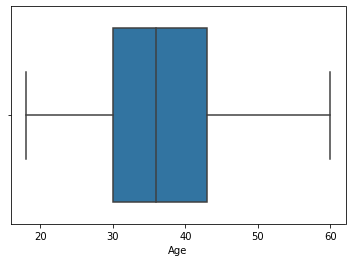

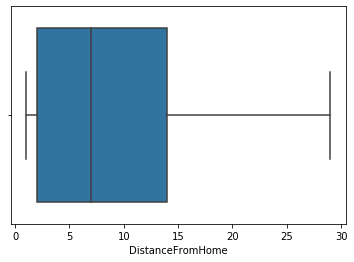

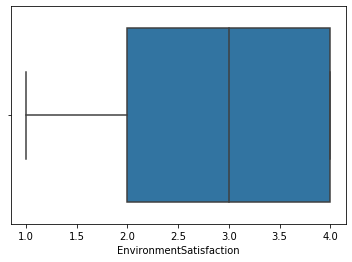

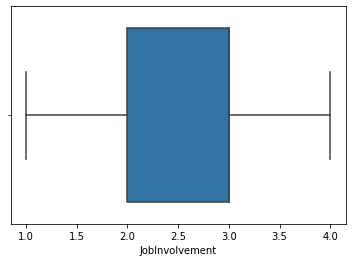

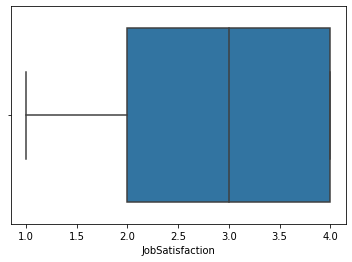

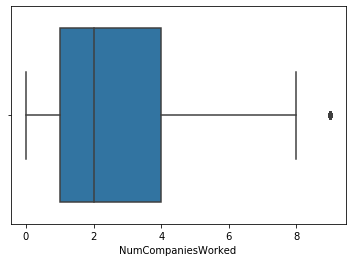

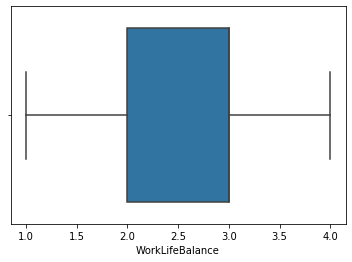

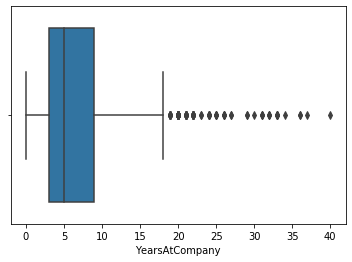

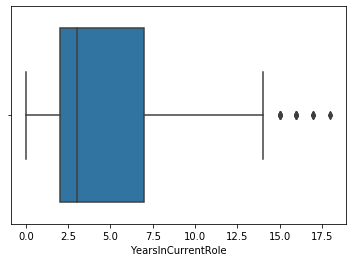

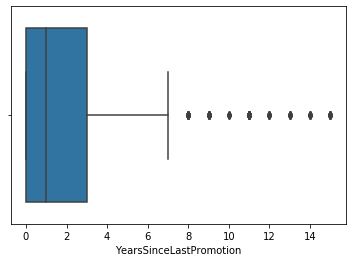

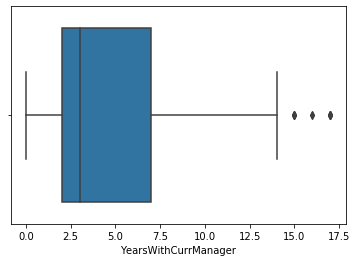

In [129]:
for cols in df_fin_num.columns:
    sns.boxplot(df_fin_num[cols])
    plt.show()

In [130]:
df_fin_num['YearsAtCompany'].value_counts()

5     196
1     171
3     128
2     127
10    120
4     110
7      90
9      82
8      80
6      76
0      44
11     32
20     27
13     24
15     20
14     18
22     15
12     14
21     14
18     13
16     12
19     11
17      9
24      6
33      5
25      4
26      4
31      3
32      3
36      2
27      2
29      2
23      2
30      1
34      1
37      1
40      1
Name: YearsAtCompany, dtype: int64

In [221]:
x1 = df_final.drop('Attrition_Yes',axis=1)
y1 = df_final['Attrition_Yes']
x1.shape
#y1.shape

(1470, 45)

In [222]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x2,y2 = sm.fit_sample(x1,y1)
x2

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,1,2,1,2,94,3,2,4,...,0,0,0,0,0,1,0,0,1,1
1,49,279,8,1,1,3,61,2,2,2,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,2,2,1,4,92,2,1,3,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,3,4,1,4,56,3,1,3,...,0,0,0,0,1,0,0,1,0,1
4,27,591,2,1,1,1,40,3,1,2,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,31,759,10,3,1,3,69,3,1,3,...,0,0,0,0,0,0,0,0,0,0
2462,40,1070,17,3,1,1,68,3,1,3,...,0,0,0,0,0,0,0,0,0,1
2463,30,608,17,3,1,1,66,1,1,3,...,0,0,0,0,0,0,0,1,0,1
2464,22,324,5,1,1,2,32,2,1,1,...,0,0,0,0,0,0,0,0,1,0


In [223]:
x2.shape

(2466, 45)

In [224]:
dfx = pd.concat([x2,y2],axis=1)
#dfx['Attrition_Yes'].value_counts()

In [225]:
x2.shape

(2466, 45)

In [226]:
import statsmodels.api as sm
glm = sm.GLM(y2,(sm.add_constant(x2)),family=sm.families.Binomial())
model = glm.fit()
model.summary()

C:\Users\Prajwalitha\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:          Attrition_Yes   No. Observations:                 2466
Model:                            GLM   Df Residuals:                     2421
Model Family:                Binomial   Df Model:                           44
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -577.95
Date:                Wed, 18 Dec 2019   Deviance:                       1155.9
Time:                        12:43:25   Pearson chi2:                 6.39e+03
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Age                                  -0.0006      0.011     -0.050      0.960      -0.023       0.021
DailyRate                            -0.0002      0.000     -1.213      0.225      -0.001       0.000
DistanceFromHome                      0.0449      0.010      4.642      0.000       0.026       0.064
Education                            -0.1533      0.077     -1.980      0.048      -0.305      -0.002
EmployeeCount                        17.3514      1.352     12.835      0.000      14.702      20.001
EnvironmentSatisfaction              -0.5336      0.075     -7.161      0.000      -0.680      -0.388
HourlyRate                           -0.0006      0.004     -0.168      0.866      -0.008       0.007
JobInvolvement                       -0.7053      0.109     -6.495      0.000      -0.918      -0.492
JobLevel                             -1.0072      0.270     -3.736      0.000      -1.536      -0.479
JobSatisfaction                      -0.4660      0.071     -6.519      0.000      -0.606      -0.326
MonthlyIncome                         0.0001   6.63e-05      1.865      0.062    -6.3e-06       0.000
MonthlyRate                        1.318e-06   1.08e-05      0.122      0.903   -1.99e-05    2.26e-05
NumCompaniesWorked                    0.1459      0.035      4.206      0.000       0.078       0.214
PercentSalaryHike                    -0.0119      0.031     -0.380      0.704      -0.073       0.049
PerformanceRating                    -0.4183      0.345     -1.214      0.225      -1.094       0.257
RelationshipSatisfaction             -0.3552      0.072     -4.915      0.000      -0.497      -0.214
StockOptionLevel                     -0.7542      0.133     -5.662      0.000      -1.015      -0.493
TotalWorkingYears                    -0.0805      0.025     -3.209      0.001      -0.130      -0.031
TrainingTimesLastYear                -0.2103      0.063     -3.315      0.001      -0.335      -0.086
WorkLifeBalance                      -0.3773      0.106     -3.551      0.000      -0.586      -0.169
YearsAtCompany                        0.1226      0.033      3.742      0.000       0.058       0.187
YearsInCurrentRole                   -0.1479      0.041     -3.643      0.000      -0.227      -0.068
YearsSinceLastPromotion               0.1753      0.036      4.850      0.000       0.104       0.246
YearsWithCurrManager                 -0.1648      0.041     -4.006      0.000      -0.245      -0.084
BusinessTravel_Travel_Frequently      0.6658      0.284      2.345      0.019       0.109       1.222
BusinessTravel_Travel_Rarely          0.0521      0.233      0.223      0.824      -0.406       0.510
Department_Research & Development    -3.5472      0.648     -5.475      0.000      -4.817      -2.277
Department_Sales       

In [227]:
l1=[]
for i in range(model.pvalues.shape[0]):
    if model.pvalues[i]<=0.05 and model.pvalues.index[i]!='const':
        l1.append(model.pvalues.index[i])
len(l1)

33

In [228]:
x2 = x2[l1]
final = pd.concat([x2,y2],axis=1)

In [229]:
final.shape

(2466, 34)

In [230]:
final['Attrition_Yes'].value_counts()

1    1233
0    1233
Name: Attrition_Yes, dtype: int64

In [231]:
final.shape

(2466, 34)

In [232]:
#y2 = dfx['Attrition_Yes']

In [233]:
X_train,X_test,y_train,y_test = train_test_split(x2,y2,test_size=0.2,random_state=1)

In [234]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

C:\Users\Prajwalitha\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [235]:
lr.score(X_train,y_train)

0.90973630831643

In [237]:
y_test.shape

(494,)

In [238]:
lr.score(X_test,y_test)
y_pred = lr.predict(X_test)

In [239]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.95      0.90       237
           1       0.95      0.84      0.89       257

    accuracy                           0.90       494
   macro avg       0.90      0.90      0.90       494
weighted avg       0.90      0.90      0.90       494

